# Examing Data from COVID-19 Outbreak

#### Import Libraries

In [1]:
import pandas as pd
from datetime import date, timedelta
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### Import Latest XLS from ECDC website

In [2]:
today = date.today()

In [3]:
day = today.strftime("%d")
month = today.strftime("%m")

In [4]:
url  = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-{}-{}.xlsx".format(month, day)

In [5]:
url

'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-26.xlsx'

#### Load into DataFrame

In [6]:
df = pd.read_excel(url)

In [7]:
df

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-22,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
6926,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
6927,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
6928,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
6929,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


#### Fix Date format from Excel to DateTime

In [8]:
#def read_date(date):
#    return xlrd.xldate.xldate_as_datetime(date, 0)

In [9]:
#df['DateRep'] = pd.to_datetime(df['DateRep'].apply(read_date), errors='coerce')

In [10]:
df

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-22,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
6926,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
6927,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
6928,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
6929,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


#### Set Date as Index

In [11]:
df.set_index('DateRep', inplace=True)
df = df.sort_index()

In [12]:
df

,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
DateRep,,,,,,,,,
2019-12-31,31,12,2019,0,0,New_Zealand,NZ,NZL,4.885500e+06
2019-12-31,31,12,2019,0,0,Philippines,PH,PHL,1.066519e+08
2019-12-31,31,12,2019,0,0,Ireland,IE,IRL,4.853506e+06
2019-12-31,31,12,2019,0,0,India,IN,IND,1.352617e+09
2019-12-31,31,12,2019,0,0,San_Marino,SM,SMR,3.378500e+04
...,...,...,...,...,...,...,...,...,...
2020-03-26,26,3,2020,2,0,Mali,ML,MLI,1.907769e+07
2020-03-26,26,3,2020,92,1,Colombia,CO,COL,4.964868e+07
2020-03-26,26,3,2020,0,0,Maldives,MV,MDV,5.156960e+05


#### Fix Inconsistent Capitalisation of Country Names

In [13]:
countries = df['Countries and territories'].values
np.unique(countries)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Finland',
       'France', 'French_Polyne

In [14]:
df.replace(['United kingdom', 'Czech republic', 'switzerland', 'CANADA'], ['United Kingdom', 'Czech Republic', 'Switzerland', 'Canada'], inplace=True)

In [15]:
countries = df['Countries and territories'].values
np.unique(countries)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Finland',
       'France', 'French_Polyne

#### Examine Global Numbers

In [16]:
df_global = df[['Cases', 'Deaths']].groupby(df.index).sum()

In [17]:
df_global.head()

,Cases,Deaths
DateRep,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


In [18]:
df_global['Total_Cases'] = df_global['Cases'].cumsum()
df_global['Total_Deaths'] = df_global['Deaths'].cumsum()

In [19]:
df_global

,Cases,Deaths,Total_Cases,Total_Deaths
DateRep,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0
...,...,...,...,...
2020-03-22,34029,1690,305270,12941
2020-03-23,33028,1660,338298,14601
2020-03-24,39815,1764,378113,16365


#### Total Confirmed Cases and Deaths Globally

In [20]:
df_global.Cases.sum()

467710

In [21]:
df_global.Deaths.sum()

20947

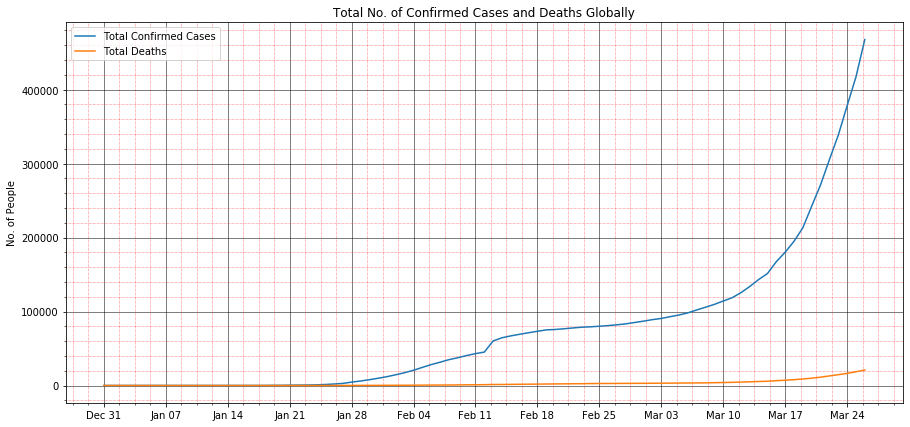

In [22]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df_global.index, df_global['Total_Cases'])
ax.plot(df_global.index, df_global['Total_Deaths'])

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.set_ylabel('No. of People')

plt.title("Total No. of Confirmed Cases and Deaths Globally")

plt.legend(['Total Confirmed Cases', 'Total Deaths'])

plt.savefig('Images/' + str(today) + ' Total No. of Confirmed Cases and Deaths Globally.png')

plt.show()

#### Daily New Confirmed Cases and Deaths Globally

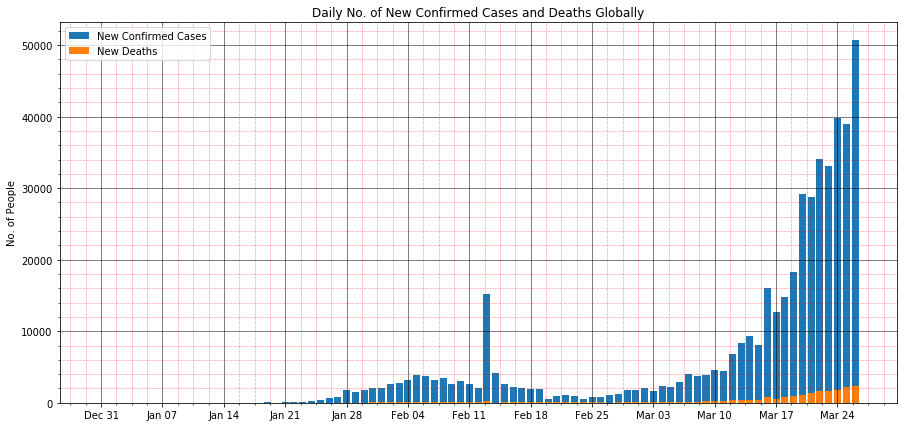

In [23]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_global.index, df_global['Cases'])
ax.bar(df_global.index, df_global['Deaths'])

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.set_ylabel('No. of People')

plt.title("Daily No. of New Confirmed Cases and Deaths Globally")

plt.legend(['New Confirmed Cases', 'New Deaths'])

plt.savefig('Images/' + str(today) + ' Daily No. of New Confirmed Cases and Deaths Globally.png')

plt.show()

#### Top 20 Countries with the Most Confirmed Cases and Deaths

In [24]:
df_countries = df.set_index('Countries and territories')

In [25]:
df_countries = df_countries.groupby('Countries and territories').sum()

In [26]:
df_countries = df_countries.sort_values('Cases', ascending=True)

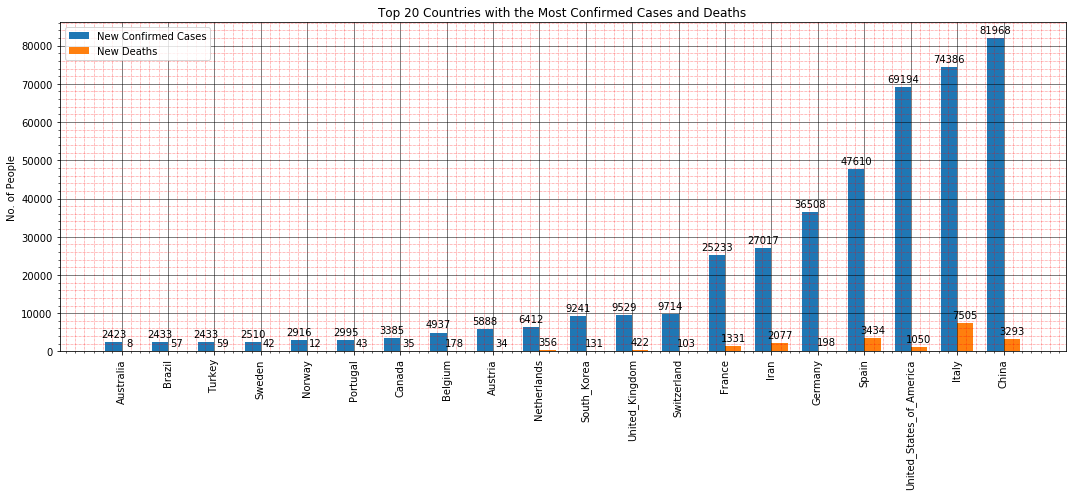

In [27]:
#plot data
labels = df_countries.index[-20:]
Cases = df_countries['Cases'][-20:]
Deaths = df_countries['Deaths'][-20:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, Cases, width, label='New Confirmed Cases')
rects2 = ax.bar(x + width/2, Deaths, width, label='New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Top 20 Countries with the Most Confirmed Cases and Deaths')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Top 20 Countries with the Most Confirmed Cases and Deaths.png')

plt.show()

  #### Find Latest Data from Yesterday

In [28]:
yesterday = today - timedelta(days = 1)

In [29]:
df_yesterday = df.loc[yesterday]
df_yesterday.set_index('Countries and territories', inplace=True)

In [30]:
df_yesterday = df_yesterday.sort_values('Cases', ascending=True)

In [31]:
df_yesterday

,Day,Month,Year,Cases,Deaths,GeoId,Country Code,Pop_Data.2018
Countries and territories,,,,,,,,
Zimbabwe,25,3,2020,0,0,ZW,ZWE,14439018.0
Bhutan,25,3,2020,0,0,BT,BTN,754394.0
Gabon,25,3,2020,0,0,GA,GAB,2119275.0
Syria,25,3,2020,0,0,SY,SYR,16906283.0
Guyana,25,3,2020,0,0,GY,GUY,779004.0
...,...,...,...,...,...,...,...,...
Germany,25,3,2020,2342,23,DE,DEU,82927922.0
France,25,3,2020,2446,240,FR,FRA,66987244.0
Italy,25,3,2020,5249,743,IT,ITA,60431283.0


#### Total No. of Confirmed Cases and Deaths Yesterday Globally

In [32]:
df_yesterday.Cases.sum()

38948

In [33]:
df_yesterday.Deaths.sum()

2200

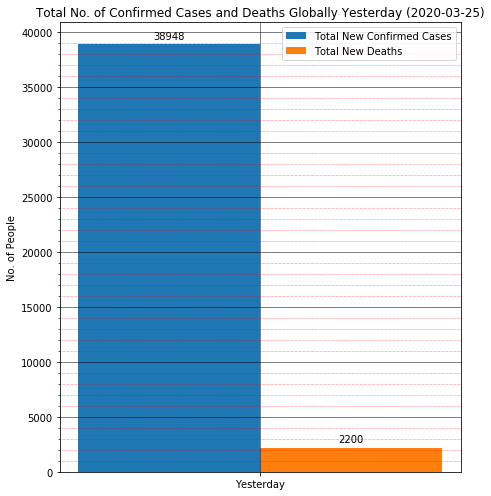

In [34]:
#plot data
labels = ['Yesterday']
Cases = df_yesterday.Cases.sum()
Deaths = df_yesterday.Deaths.sum()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 7))
rects1 = ax.bar(x - width/2, Cases, width, label='Total New Confirmed Cases')
rects2 = ax.bar(x + width/2, Deaths, width, label='Total New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Total No. of Confirmed Cases and Deaths Globally Yesterday (' + str(yesterday) + ')')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Total No. of Confirmed Cases and Deaths Globally Yesterday (' + str(yesterday) + ').png')

plt.show()

#### Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday

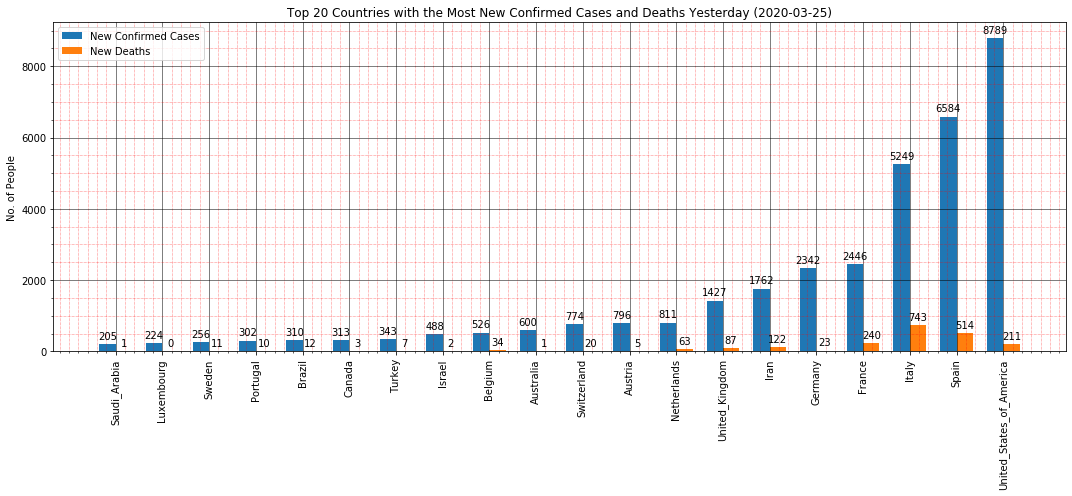

In [35]:
#plot data
labels = df_yesterday.index[-20:]
Cases = df_yesterday['Cases'][-20:]
Deaths = df_yesterday['Deaths'][-20:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, Cases, width, label='New Confirmed Cases')
rects2 = ax.bar(x + width/2, Deaths, width, label='New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday (' + str(yesterday) + ')')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday ('
            + str(yesterday) + ').png')

plt.show()

#### Find Data for Specific Countries (e.g. DE, UK, CN) and Compare

(Can also be EU-wide too by using ```df.loc[df['EU'] == "EU"]``` )

In [44]:
df_sub1 = df.loc[df['GeoId'] == "DE"]
df_sub2 = df.loc[df['GeoId'] == "FR"]

#### Daily No. of New Confirmed Cases and Deaths in X & Y

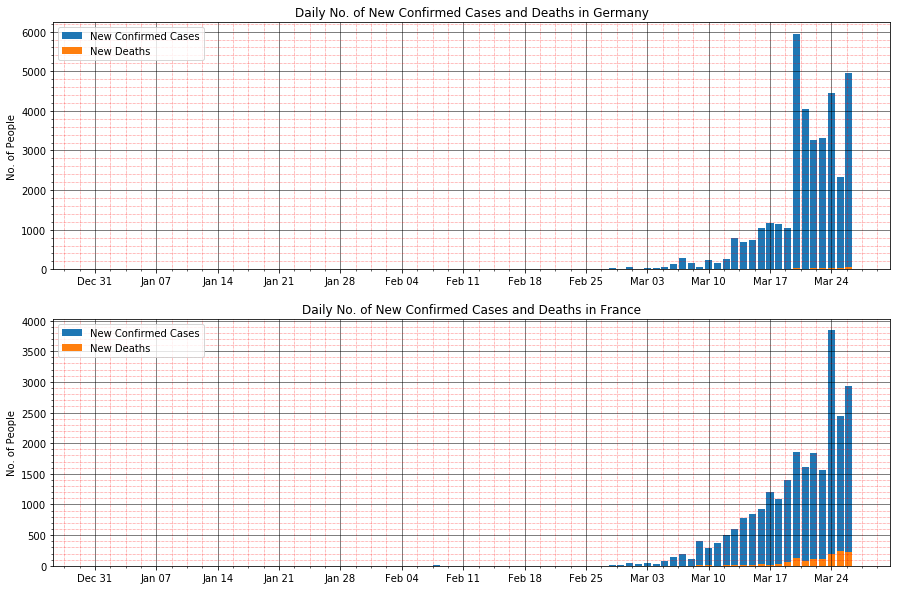

In [45]:
#plot data
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].bar(df_sub1.index, df_sub1['Cases'])
axs[0].bar(df_sub1.index, df_sub1['Deaths'])

#Set 
axs[1].bar(df_sub2.index, df_sub2['Cases'])
axs[1].bar(df_sub2.index, df_sub2['Deaths'])

#set ticks every week
axs[0].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
axs[1].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#Gridlines
axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[0].set_ylabel('No. of People')

axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[1].set_ylabel('No. of People')


#Titles
title1 = df_sub1['Countries and territories'].unique()[0]
title2 = df_sub2['Countries and territories'].unique()[0]
axs[0].title.set_text("Daily No. of New Confirmed Cases and Deaths in " + title1)
axs[1].title.set_text("Daily No. of New Confirmed Cases and Deaths in " + title2)

#Legends
axs[0].legend(['New Confirmed Cases', 'New Deaths'], loc=2)
axs[1].legend(['New Confirmed Cases', 'New Deaths'], loc=2)

plt.savefig('Images/' + str(today) + ' Daily No. of New Confirmed Cases and Deaths in ' + title1 + ' & ' + title2 + '.png')

plt.show()

#### Total No. of Confirmed Cases and Deaths in X & Y

In [46]:
df_sub1['Total_Cases'] = df_sub1.loc[:,'Cases'].cumsum()
df_sub1['Total_Deaths'] = df_sub1.loc[:,'Deaths'].cumsum()

df_sub2['Total_Cases'] = df_sub2.loc[:,'Cases'].cumsum()
df_sub2['Total_Deaths'] = df_sub2.loc[:,'Deaths'].cumsum()


C:\Users\Josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

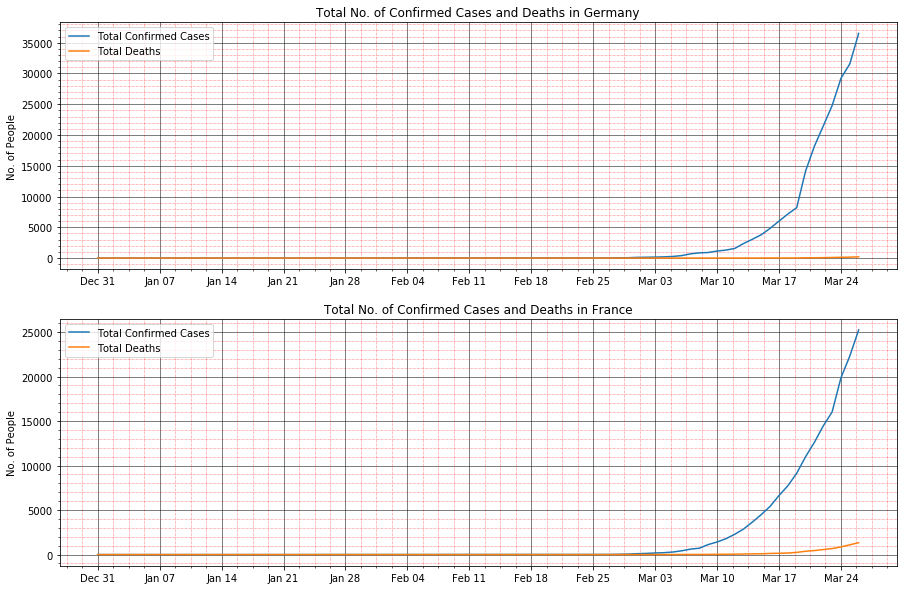

In [47]:
#plot data
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(df_sub1.index, df_sub1['Total_Cases'])
axs[0].plot(df_sub1.index, df_sub1['Total_Deaths'])

#Set 
axs[1].plot(df_sub2.index, df_sub2['Total_Cases'])
axs[1].plot(df_sub2.index, df_sub2['Total_Deaths'])

#set ticks every week
axs[0].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
axs[1].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#Gridlines
axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[0].set_ylabel('No. of People')

axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[1].set_ylabel('No. of People')


#Titles
title1 = df_sub1['Countries and territories'].unique()[0]
title2 = df_sub2['Countries and territories'].unique()[0]
axs[0].title.set_text("Total No. of Confirmed Cases and Deaths in " + title1)
axs[1].title.set_text("Total No. of Confirmed Cases and Deaths in " + title2)

#Legends
axs[0].legend(['Total Confirmed Cases', 'Total Deaths'], loc=2)
axs[1].legend(['Total Confirmed Cases', 'Total Deaths'], loc=2)

plt.savefig('Images/'+str(today) + ' Total No. of Confirmed Cases and Deaths in ' + title1 + ' & ' + title2 + '.png')

plt.show()